In [3]:
from complex_mode_overlap import *
import numpy as np

# loading, reshaping, clipping COMSOL .dat

In [6]:
dat_fiber, param_fiber = loadData('../normE_fiber1.dat')
dat, param_list = loadData('../normE_all10.dat')


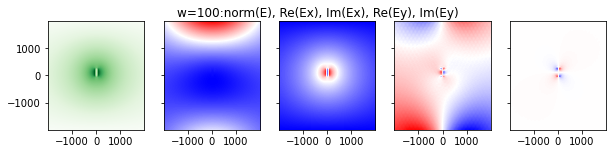

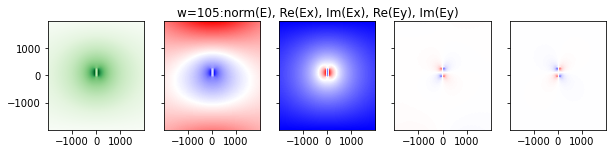

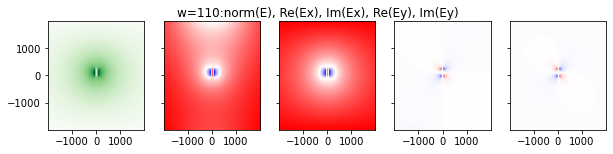

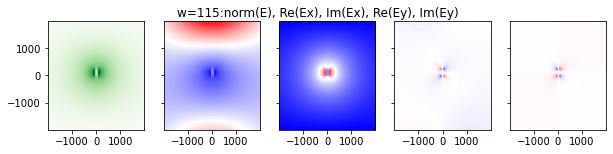

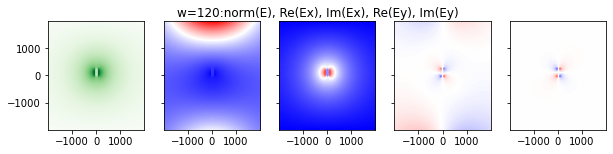

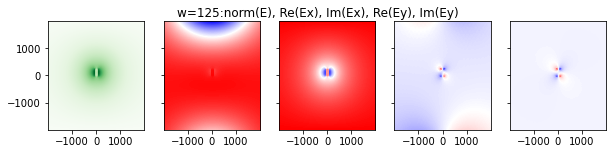

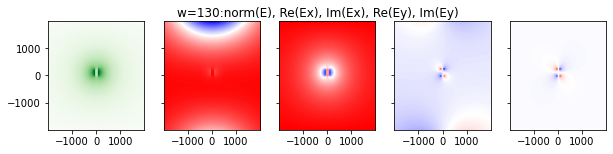

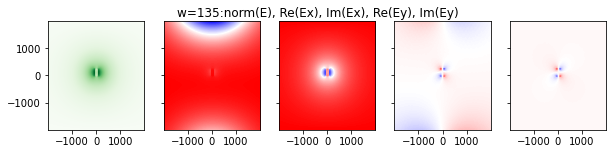

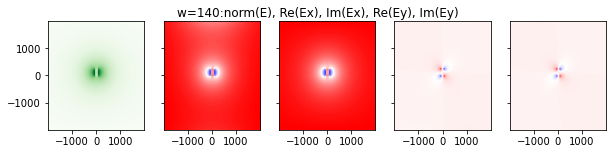

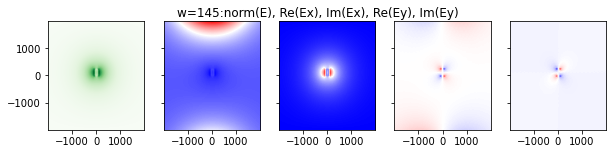

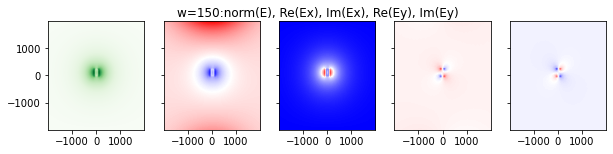

In [7]:
plotComplexData(dat, param_list, bound=2000)

In [7]:
x, y, z = datToxyz(dat)

In [10]:
a = dat[:,2:]
b = np.reshape(a,(250000,11,3))

In [11]:
np.shape(b)

(250000, 11, 3)

In [13]:
def dattoxyComplexE(dat, n_param):
    
    x = np.real(dat[:, 0]); y = np.real(dat[:, 1])

    Edata   = dat[:,2:]
    (m,n)   = np.shape(dat)
    Enormxy = np.reshape(Edata,(m,n_param,3))

    return x, y, Enormxy

def convolveComplex1(dat_ref, dat_list, param_list,
                 bound=2000, scale = 1,
                 res=100j, plotflag1 = False,
                 plotflag2=True, fitflag= False,
                 i=0):

    xref, yref, Eref = datToxyz(dat_ref)
    values_ref, corners_ref = cropData(xref, yref, z, bound,scale,res)   
    #values dimension: (res, res, n_param, 3)

    xclist = []
    xcpeaks = []


    for i in range(len(n)):

        x, y, z = datToxyz(dat_list,i)
        values, corners     = cropData(x, y, z, bound,scale,res)       
        xc_norm = getCorrelation(values_ref, values)

        #if fitflag:
        normpeak, xcfit = fitCorrelation(xc_norm)
        # else:
        #     normpeak = np.max(xc_norm)

        xclist.append(xc_norm)
        xcpeaks.append(normpeak)

        if plotflag1:
            plotCorr2D(xc_norm, xcfit, corners, fitflag)

    if plotflag2:
        plotCorrvsparams(param_list, xcpeaks)

In [15]:
x,y,Enormxy = dattoxyComplexE(dat, 11)

In [16]:
np.shape(Enormxy)

(250000, 11, 3)

In [20]:
values_ref, corners_ref = cropData(x, y, Enormxy, bound=2000, scale = 1,
                 res=100j,)     


In [22]:
np.shape(values_ref)

(100, 100, 11, 3)